In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
data_train = pd.read_csv("./train.csv")
data_test = pd.read_csv("./test.cs v")
data_test.info()
combine = pd.concat([data_train.drop('Survived',1),data_test])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [46]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

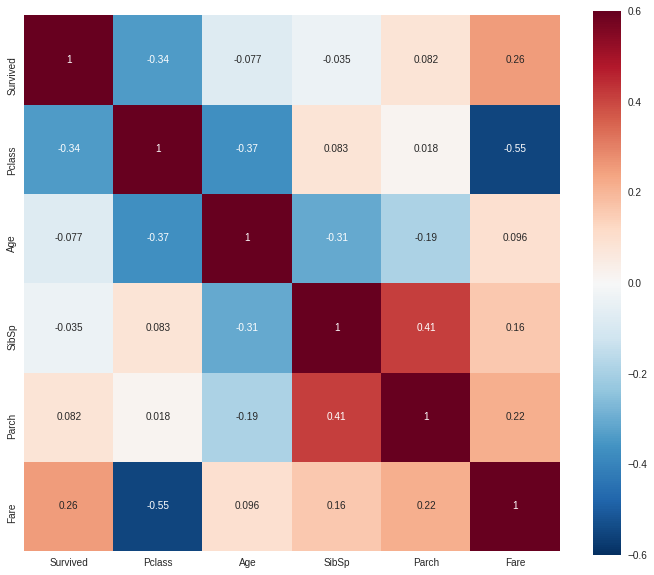

In [63]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(data_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

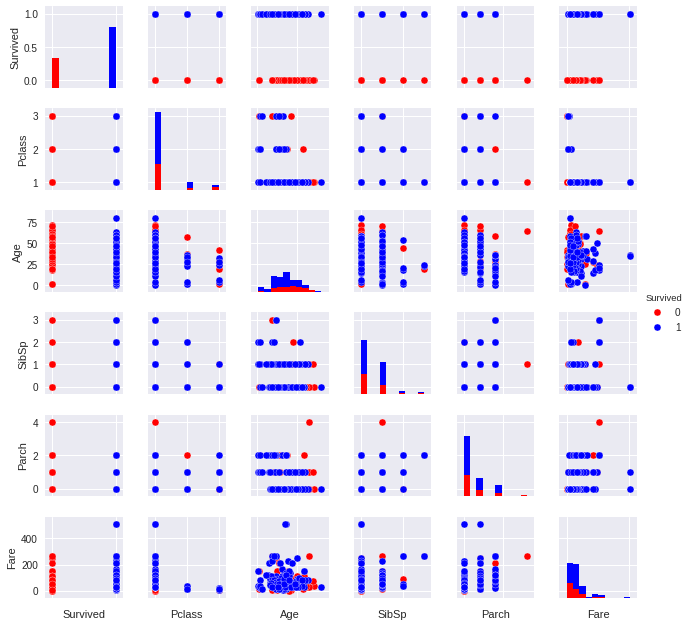

In [62]:
surv = data_train[data_train['Survived']==1]
nosurv = data_train[data_train['Survived']==0]
surv.count()
surv_col = "blue"
nosurv_col = "red"

cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
g = sns.pairplot(data=data_train.dropna(), vars=cols, size=1.5,
                 hue='Survived', palette=[nosurv_col,surv_col])
g.set(xticklabels=[])

Median age survivors: 28.0, Median age non-survivers: 28.0


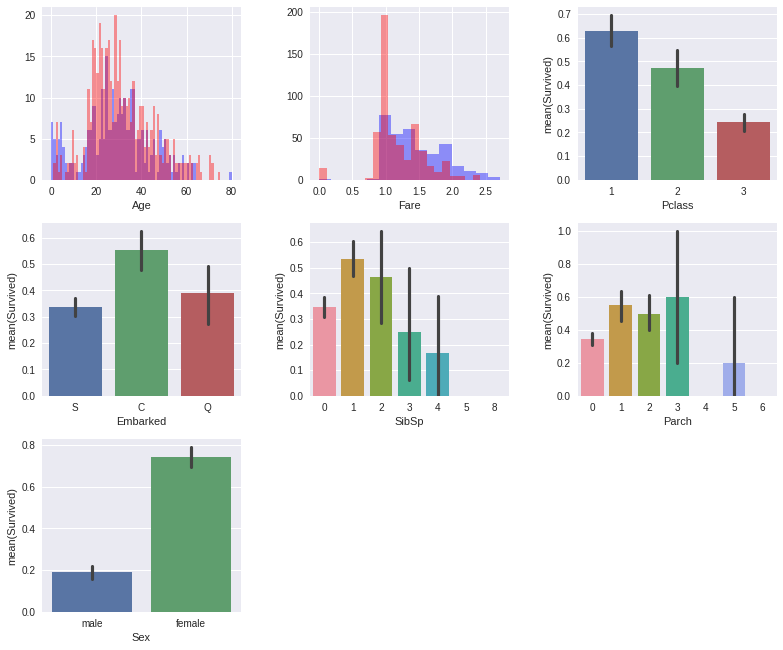

In [68]:
import numpy as np

plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_col,
            axlabel='Age')
plt.subplot(332)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_col)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_col,axlabel='Fare')
plt.subplot(337)
sns.barplot('Sex', 'Survived', data=data_train)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=data_train)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=data_train)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=data_train)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=data_train)


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

print("Median age survivors: %.1f, Median age non-survivers: %.1f"\
      %(np.median(surv['Age'].dropna()), np.median(nosurv['Age'].dropna())))

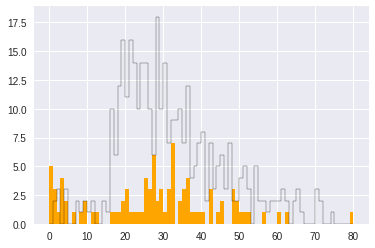

In [82]:
msurv = data_train[(data_train['Survived']==1) & (data_train['Sex']=="male")]
fsurv = data_train[(data_train['Survived']==1) & (data_train['Sex']=="female")]

mnosurv = data_train[(data_train['Survived']==0) & (data_train['Sex']=="male")]
fnosurv = data_train[(data_train['Survived']==0) & (data_train['Sex']=="female")]

dummy = plt.hist(msurv['Age'].dropna().values, color="orange", bins=np.arange(0,81,1))
dummy = plt.hist(mnosurv['Age'].dropna().values, histtype="step", color="black", bins=np.arange(0,81,1))


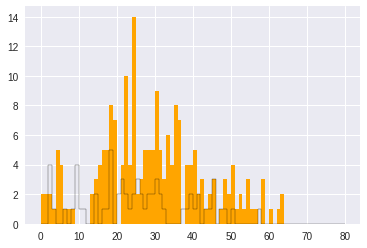

In [83]:
dummy = plt.hist(fsurv['Age'].dropna().values, color="orange", bins=np.arange(0,81,1))
dummy = plt.hist(fnosurv['Age'].dropna().values, histtype="step", color="black", bins=np.arange(0,81,1))


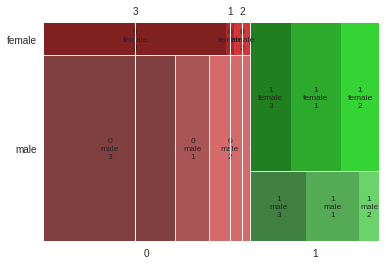

In [88]:
from statsmodels.graphics.mosaicplot import mosaic
dummy = mosaic(data_train,["Survived","Sex","Pclass"])

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


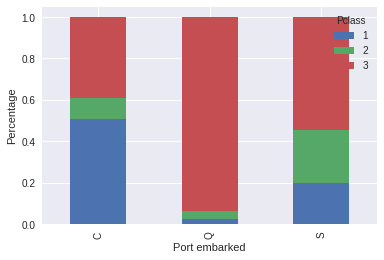

In [90]:
ports = pd.crosstab(data_train['Embarked'], data_train['Pclass'])
print(ports)
dummy = ports.div(ports.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

In [126]:
# Age
data_train.Age = data_train.Age.fillna(-0.5)
categories = pd.cut(data_train.Age, (-1, 0, 5, 15, 25, 40, 60,120),
                        labels=["Null", "baby","child", "teen", "adult", "senior", "very_senior"])
data_train.Age = categories

# Fare
categories = pd.cut(data_train.Fare, (0,10,15,20,25,30,50,1000),
                        labels=[1,2,3,4,5,6,7])
data_train.Fare = categories
data_train.Fare = data_train.Fare.fillna(1)

In [93]:
# Age
data_test.Age = data_test.Age.fillna(-0.5)
categories = pd.cut(data_test.Age, (-1, 0, 5, 15, 25, 40, 60,120),
                        labels=["Null", "baby","child", "teen", "adult", "senior", "very_senior"])
data_test.Age = categories

# Fare
categories = pd.cut(data_test.Fare, (0,10,15,20,25,30,50,1000),
                        labels=[1,2,3,4,5,6,7])
data_test.Fare = categories
data_test.Fare = data_test.Fare.fillna(1)

In [182]:
data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch'] + 1

data_train["Family"] = 0
data_train.loc[data_train['FamilySize'] > 0, 'Family'] = 1

data_train['IsAlone'] = 0
data_train.loc[data_train['FamilySize'] == 1, 'IsAlone'] = 1



1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [95]:
data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch'] + 1

data_test["Family"] = 0
data_test.loc[data_test['FamilySize'] > 0, 'Family'] = 1

data_test['IsAlone'] = 0
data_test.loc[data_test['FamilySize'] == 1, 'IsAlone'] = 1

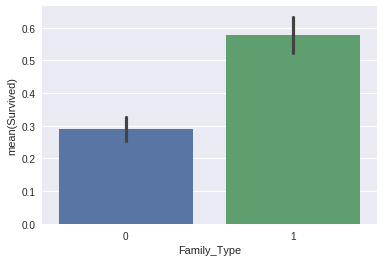

In [149]:
data_train["Family_Type"] = 0
data_train.loc[(data_train["FamilySize"]>1) & (data_train["FamilySize"]<=4), "Family_Type"] = 1
data_train.loc[(data_train["FamilySize"]<1), "Family_Type"] = 0
data_train.loc[(data_train["FamilySize"]>4), "Family_Type"] = 0
data_train["Family_Type"]

sns.barplot('Family_Type', 'Survived', data=data_train)


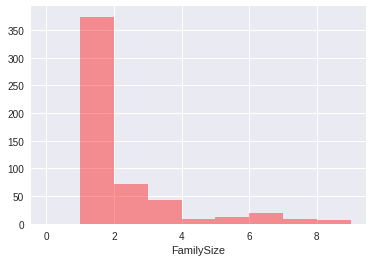

In [185]:
surv = data_train[data_train["Survived"] ==1]
nosurv = data_train[data_train["Survived"] ==0]

sns.distplot(surv['FamilySize'].dropna().values, bins=range(0, 10, 1), kde=False, color=surv_col)
sns.distplot(nosurv['FamilySize'].dropna().values, bins=range(0, 10, 1), kde=False, color=nosurv_col,
            axlabel='FamilySize')

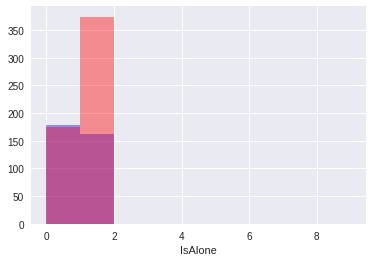

In [181]:
surv = data_train[data_train["Survived"] ==1]
nosurv = data_train[data_train["Survived"] ==0]

sns.distplot(surv['IsAlone'].dropna().values, bins=range(0, 10, 1), kde=False, color=surv_col)
sns.distplot(nosurv['IsAlone'].dropna().values, bins=range(0, 10, 1), kde=False, color=nosurv_col,
            axlabel='IsAlone')


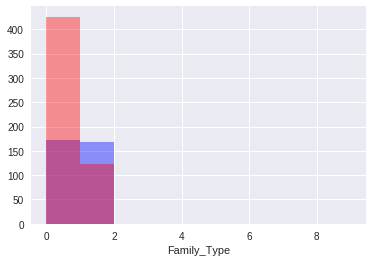

In [150]:
surv = data_train[data_train["Survived"] ==1]
nosurv = data_train[data_train["Survived"] ==0]

sns.distplot(surv['Family_Type'].dropna().values, bins=range(0, 10, 1), kde=False, color=surv_col)
sns.distplot(nosurv['Family_Type'].dropna().values, bins=range(0, 10, 1), kde=False, color=nosurv_col,
            axlabel='Family_Type')


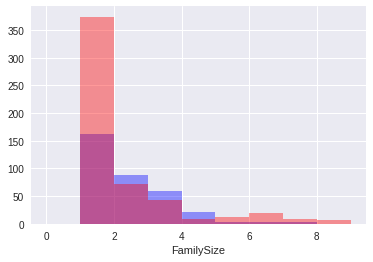

In [120]:
surv = data_train[data_train["Survived"] ==1]
nosurv = data_train[data_train["Survived"] ==0]

sns.distplot(surv['FamilySize'].dropna().values, bins=range(0, 10, 1), kde=False, color=surv_col)
sns.distplot(nosurv['FamilySize'].dropna().values, bins=range(0, 10, 1), kde=False, color=nosurv_col,
            axlabel='FamilySize')



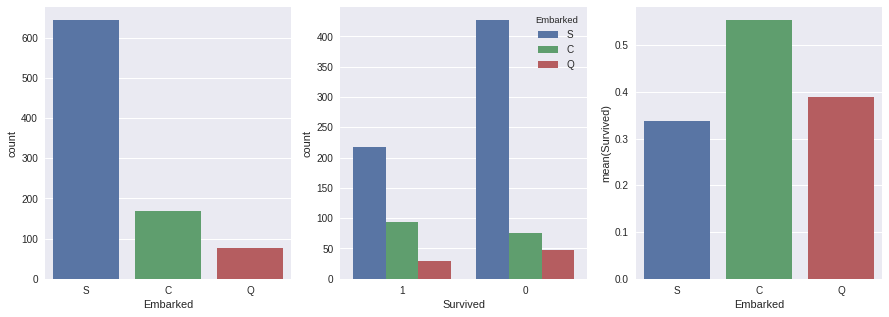

In [34]:
# average survived passengers by Embarked
import seaborn as sns
%matplotlib inline
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
average_age = data_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.countplot(x = "Embarked", data=data_train, ax = axis1 , order=["S","C","Q"])
sns.barplot(x='Embarked', y='Survived', data=average_age, ax=axis3, order=["S","C","Q"])
sns.countplot(x='Survived', hue="Embarked", data=data_train, order=[1,0], ax=axis2)

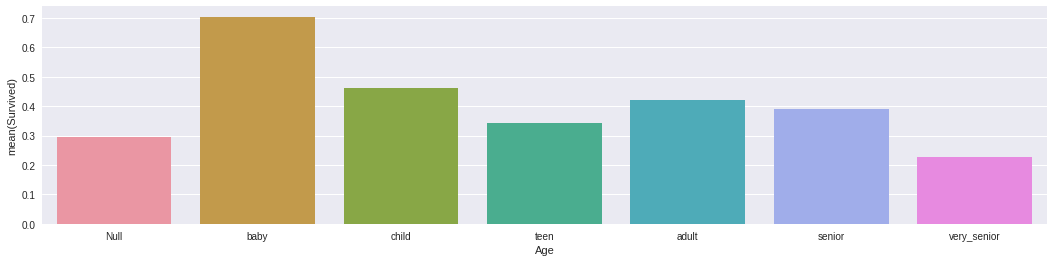

In [35]:
# average survived passengers by age
%matplotlib inline
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = data_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

# # peaks for survived/not survived passengers by their age
# facet = sns.FacetGrid(data_train, hue="Survived",aspect=4)
# facet.map(sns.kdeplot,'Age',shade= True)
# facet.set(xlim=(0, data_train['Age'].max()))
# facet.add_legend()

In [151]:
from sklearn import preprocessing

data_train["Age"] = preprocessing.LabelEncoder().fit(data_train["Age"]).transform(data_train["Age"])
data_train["Fare"] = preprocessing.LabelEncoder().fit(data_train["Fare"]).transform(data_train["Fare"])
data_train["Sex"] = preprocessing.LabelEncoder().fit(data_train["Sex"]).transform(data_train["Sex"])

data_train.Embarked = data_train.Embarked.fillna("S")
data_train["Embarked"] = preprocessing.LabelEncoder().fit(data_train["Embarked"]).transform(data_train["Embarked"])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train[["Sex", "Age", "Pclass", "Family_Type", "IsAlone", "Fare"]],
                                                        data_train["Survived"], test_size=.3)

In [153]:
from sklearn import preprocessing

data_test["Age"] = preprocessing.LabelEncoder().fit(data_test["Age"]).transform(data_test["Age"])
data_test["Fare"] = preprocessing.LabelEncoder().fit(data_test["Fare"]).transform(data_test["Fare"])
data_test["Sex"] = preprocessing.LabelEncoder().fit(data_test["Sex"]).transform(data_test["Sex"])

data_test.Embarked = data_test.Embarked.fillna("S")
data_test["Embarked"] = preprocessing.LabelEncoder().fit(data_test["Embarked"]).transform(data_test["Embarked"])


from sklearn.model_selection import train_test_split
X = data_test[["Sex", "Age", "Pclass", "Family_Type", "IsAlone", "Fare", "PassengerId"]]
X2 = data_test[["Sex", "Age", "Pclass", "Family_Type", "IsAlone", "Fare"]]
                                                

ValueError: y contains new labels: [ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]

In [116]:
data_train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [172]:
from sklearn import svm
cf = svm.SVC()
cf.fit(X_train, y_train)
print("Training "+str(cf.score(X_train, y_train)))
print("Testing "+str(cf.score(X_test, y_test)))
# Sex	Age	Pclass	Family_Type	IsAlone	Fare

Training 0.831460674157
Testing 0.783582089552


AttributeError: module 'sklearn.svm' has no attribute 'feature_importances_'

In [170]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
print("Training "+str(random_forest.score(X_train, y_train)))
print("Testing "+str(random_forest.score(X_test, y_test)))
random_forest.feature_importances_
# Sex	Age	Pclass	Family_Type	IsAlone	Fare


Training 0.871589085072
Testing 0.809701492537


array([ 0.36961464,  0.22260633,  0.13493705,  0.06436819,  0.03557636,
        0.17289742])

In [30]:
abc = DataFrame()
abc["PassengerId"] = X["PassengerId"]
abc["Survived"]=random_forest.predict(X2)


In [36]:
abc.to_csv("test_new1.csv", sep=',' ,index=False )

In [173]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
print("Training "+str(knn.score(X_train, y_train)))
print("Testing "+str(knn.score(X_test, y_test)))
knn.feature_importances_
# Sex	Age	Pclass	Family_Type	IsAlone	Fare


Training 0.84430176565
Testing 0.809701492537


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
        import t as xgb
from mlxtend.classifier import StackingClassifier
clf_vote = VotingClassifier(
    estimators=[
        #('tree', clf_tree),
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('extra', clf_ext),
       #('gb', clf_gb),
        ('xgb', clf_xgb),
        ('percep', clf_pctr),
        ('logistic', clf_log),
        #('RF', clf_rf),
        ],
    weights=[2,2,3,3,1,2],
    voting='hard')
clf_vote.fit(X_train,y_train)

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Voting: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


ImportError: No module named 'xgboost'

In [3]:
# get Correlation Coefficient for each feature using Logistic Regression
from pandas import DataFrame
coeff_df = DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

NameError: name 'X_train' is not defined

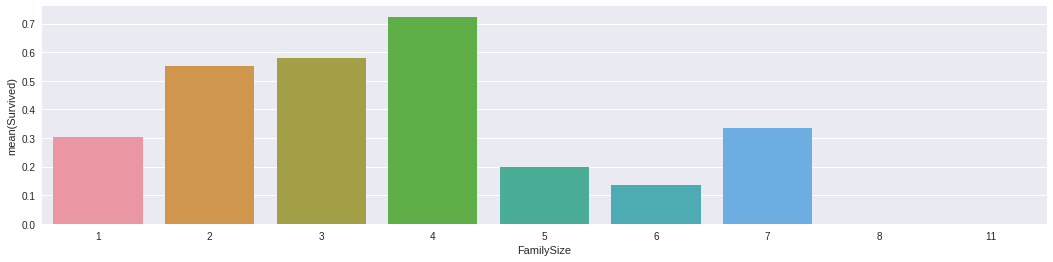

In [329]:
# average survived passengers by age
import seaborn as sns
%matplotlib inline
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = data_train[["FamilySize", "Survived"]].groupby(['FamilySize'],as_index=False).mean()
sns.barplot(x='FamilySize', y='Survived', data=average_age)

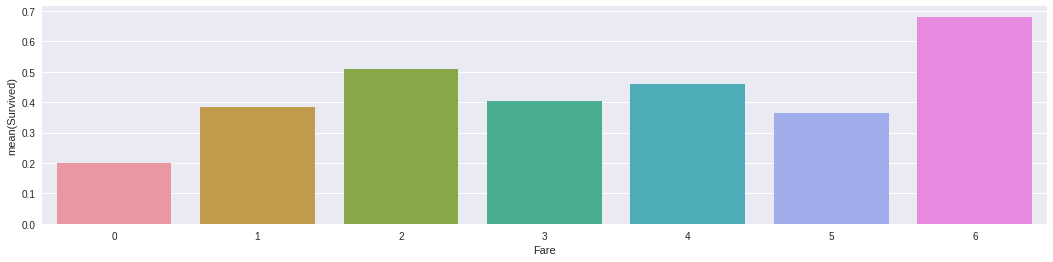

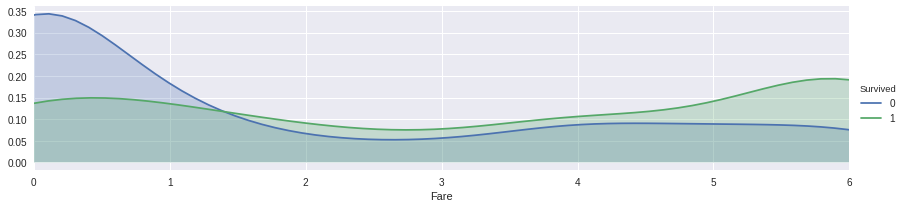

In [326]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = data_train[["Fare", "Survived"]].groupby(['Fare'],as_index=False).mean()
sns.barplot(x='Fare', y='Survived', data=average_age)

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(data_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, data_train['Fare'].max()))
facet.add_legend()